# Equillibrium chemistry model with TRIDENT

### This tutorial demonstrates how to read in an equillibrium chemistry databse precomputed by Fastchem, and use the database to generate transmission spectrum under equillibrium chemistry with Trident. 

### The database should be downloaded and put under the same directory as the environment vairable "POSEIDON_input_data" that we have set up.

### First, let's view the information of the grid!

In [12]:
from POSEIDON.eq_interpolate import get_grid, print_grid_info
print_grid_info()

Temperature grid: [ 300.  400.  500.  600.  700.  800.  900. 1000. 1100. 1200. 1300. 1400.
 1500. 1600. 1700. 1800. 1900. 2000. 2100. 2200. 2300. 2400. 2500. 2600.
 2700. 2800. 2900. 3000. 3100. 3200. 3300. 3400. 3500. 3600. 3700. 3800.
 3900. 4000.]
Pressure grid: [1.0000000e-07 3.1622776e-07 1.0000000e-06 3.1622776e-06 9.9999997e-06
 3.1622778e-05 9.9999997e-05 3.1622776e-04 1.0000000e-03 3.1622776e-03
 9.9999998e-03 3.1622775e-02 1.0000000e-01 3.1622776e-01 1.0000000e+00
 3.1622777e+00 1.0000000e+01 3.1622776e+01 1.0000000e+02]
Metallicity grid: [1.0000000e-01 1.1220185e-01 1.2589253e-01 1.4125375e-01 1.5848932e-01
 1.7782794e-01 1.9952624e-01 2.2387211e-01 2.5118864e-01 2.8183830e-01
 3.1622776e-01 3.5481340e-01 3.9810717e-01 4.4668359e-01 5.0118721e-01
 5.6234133e-01 6.3095737e-01 7.0794576e-01 7.9432821e-01 8.9125091e-01
 1.0000000e+00 1.1220185e+00 1.2589254e+00 1.4125376e+00 1.5848932e+00
 1.7782794e+00 1.9952623e+00 2.2387211e+00 2.5118864e+00 2.8183830e+00
 3.1622777e+00 3.54

### You could also get the grid about a single variable as a numpy array. 

In [13]:
print(get_grid('T'))
print(get_grid('P'))
print(get_grid('C/O'))
print(get_grid('M/H'))

[ 300.  400.  500.  600.  700.  800.  900. 1000. 1100. 1200. 1300. 1400.
 1500. 1600. 1700. 1800. 1900. 2000. 2100. 2200. 2300. 2400. 2500. 2600.
 2700. 2800. 2900. 3000. 3100. 3200. 3300. 3400. 3500. 3600. 3700. 3800.
 3900. 4000.]
[1.0000000e-07 3.1622776e-07 1.0000000e-06 3.1622776e-06 9.9999997e-06
 3.1622778e-05 9.9999997e-05 3.1622776e-04 1.0000000e-03 3.1622776e-03
 9.9999998e-03 3.1622775e-02 1.0000000e-01 3.1622776e-01 1.0000000e+00
 3.1622777e+00 1.0000000e+01 3.1622776e+01 1.0000000e+02]
[0.2        0.25       0.3        0.35       0.4        0.45
 0.5        0.55       0.6        0.65       0.7        0.75
 0.8        0.85       0.9        0.9095238  0.9190476  0.9285714
 0.9380952  0.947619   0.95714283 0.96666664 0.97619045 0.98571426
 0.99523807 1.0047619  1.0142857  1.0238096  1.0333333  1.0428572
 1.0523809  1.0619048  1.0714285  1.0809524  1.0904762  1.1
 1.1692308  1.2384615  1.3076923  1.3769231  1.4461539  1.5153847
 1.5846153  1.6538461  1.7230769  1.7923077  1.86

### Example 2: Interpolating the database.
The function can return either a dictionary or an array.

In [14]:
from POSEIDON.eq_interpolate import read_logX
import numpy as np
T = np.full(20, 1000)
P = np.full(20, 0)
C_O = 1
Met = 0
species = ['H2O', 'CH4', 'NH3', 'CO2'] # hydrogen ion
log_X_params_dict = read_logX(P, T, C_O, Met, species, return_dict=True)
log_X_params_array = read_logX(P, T, C_O, Met, species, return_dict=False)
print("Returning dictionary:")
print(log_X_params_dict)
print("_________________________________________________________________________")
print("Returning array:")
print(log_X_params_array)

Returning dictionary:
{'H2O': array([-3.19850969, -3.19850969, -3.19850969, -3.19850969, -3.19850969,
       -3.19850969, -3.19850969, -3.19850969, -3.19850969, -3.19850969,
       -3.19850969, -3.19850969, -3.19850969, -3.19850969, -3.19850969,
       -3.19850969, -3.19850969, -3.19850969, -3.19850969, -3.19850969]), 'CH4': array([-3.08819187, -3.08819187, -3.08819187, -3.08819187, -3.08819187,
       -3.08819187, -3.08819187, -3.08819187, -3.08819187, -3.08819187,
       -3.08819187, -3.08819187, -3.08819187, -3.08819187, -3.08819187,
       -3.08819187, -3.08819187, -3.08819187, -3.08819187, -3.08819187]), 'NH3': array([-5.45764303, -5.45764303, -5.45764303, -5.45764303, -5.45764303,
       -5.45764303, -5.45764303, -5.45764303, -5.45764303, -5.45764303,
       -5.45764303, -5.45764303, -5.45764303, -5.45764303, -5.45764303,
       -5.45764303, -5.45764303, -5.45764303, -5.45764303, -5.45764303]), 'CO2': array([-7.64166641, -7.64166641, -7.64166641, -7.64166641, -7.64166641,
       

### Now, let's create a plot showing how mixing ratios of species change as pressure changes.

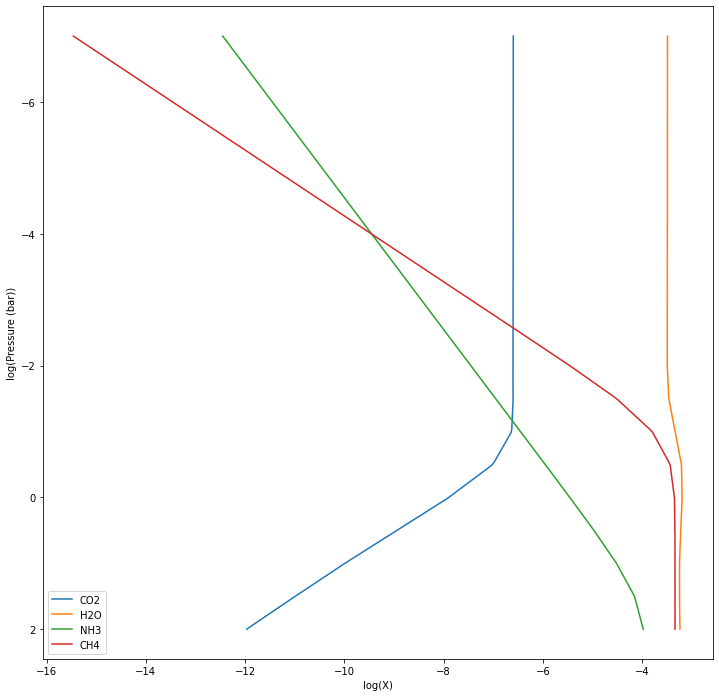

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os

log_P_range = np.linspace(-7, 2, 200)
T_single = 1000
C_O_single = 0.55
log_Met_single = 0

species = ['CO2', 'H2O', 'NH3', 'CH4'] # Raise an exception if not existed
figure = plt.figure()
figure.set_size_inches(12.0, 12.0)
for i in range(0, len(species)):
  plt.plot(read_logX(log_P_range, T_single, C_O_single, log_Met_single, species[i], return_dict=False), log_P_range, label=species[i])

plt.xscale('linear')
plt.yscale('linear')
plt.gca().set_ylim(plt.gca().get_ylim()[::-1])

plt.xlabel("log(X)")
plt.ylabel("log(Pressure (bar))")
plt.legend()

plt.show()

# we could also save the figure as a pdf
os.makedirs('../output',exist_ok=True)
figure.savefig('../output/log(X)-log(P)_new.pdf')

### We can use get_supported_species() to get a list of all the chemical species we support.
The plot below will show you how mixing ratios change as C/O varies.

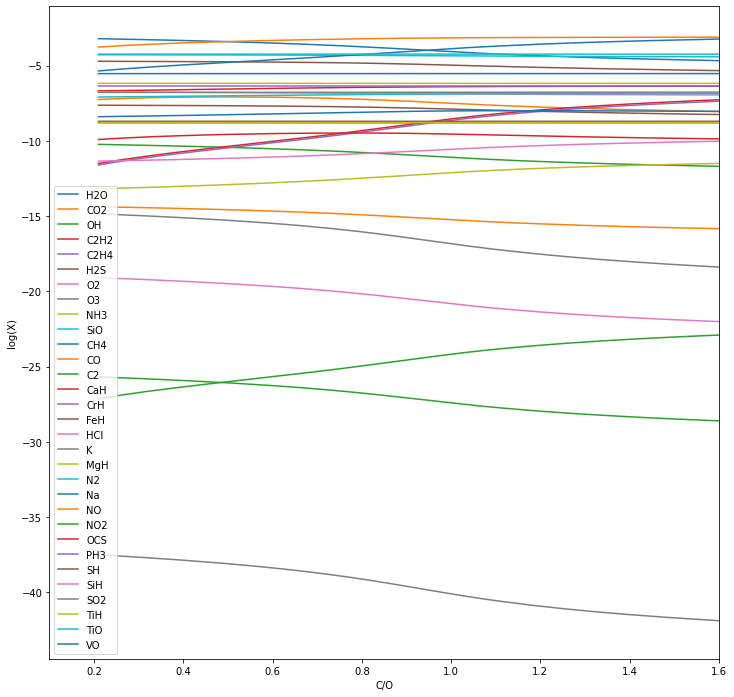

In [16]:
from POSEIDON.eq_interpolate import get_supported_species
species = get_supported_species()
log_P_single = 0.1
T_single = 1400
C_O_range = np.linspace(0.21, 2, 5000)
log_Met_single = 0

figure = plt.figure()
figure.set_size_inches(12.0, 12.0)

plt.gca().invert_yaxis()
plt.xlim([0.1, 1.6])


for i in range(0, len(species)):
  plt.plot(C_O_range, read_logX(log_P_single, T_single, C_O_range, log_Met_single, species[i], return_dict=False), label=species[i])
  
plt.xscale('linear')
plt.yscale('linear')
plt.gca().set_ylim(plt.gca().get_ylim()[::-1])


plt.xlabel("C/O")
plt.ylabel("log(X)")
plt.legend()

plt.show()
figure.savefig('../output/CO-log(X)_new.pdf')

### The final example will show how mixing ratios change as metallicity changes.

/Users/Victini/opt/anaconda3/envs/poseidon/lib/python3.8/site-packages/scipy/interpolate/_interpolate.py:2557: RuntimeWarning: invalid value encountered in multiply
  values += np.asarray(self.values[edge_indices]) * weight[vslice]
/Users/Victini/opt/anaconda3/envs/poseidon/lib/python3.8/site-packages/scipy/interpolate/_interpolate.py:2557: RuntimeWarning: invalid value encountered in multiply
  values += np.asarray(self.values[edge_indices]) * weight[vslice]


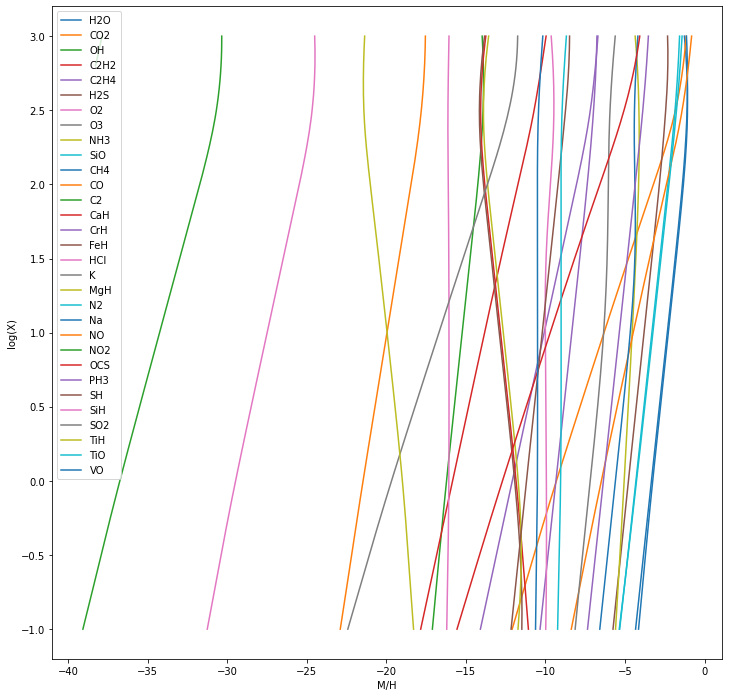

In [17]:
log_P_single = np.full(5000, 0.1)
T_single = np.full(5000, 900)
C_O_single = np.full(5000, 0.55)
log_Met_range = np.linspace(-1, 3, 5000)

figure = plt.figure()
figure.set_size_inches(12.0, 12.0)

for i in range(0, len(species)):
  fig = plt.plot(read_logX(log_P_single, T_single, C_O_single, log_Met_range, species[i], return_dict=False), log_Met_range, label=species[i])
  
plt.xscale('linear')
plt.yscale('linear')

plt.gca().invert_yaxis()
plt.gca().set_ylim(plt.gca().get_ylim()[::-1])

plt.xlabel("M/H")
plt.ylabel("log(X)")
plt.legend()

plt.show()
figure.savefig('../output/MH-log(X)_new.pdf')

In [19]:
log_P_range = -1.0
T_single = 2000
C_O_single = 0.55
log_Met_single = 0
read_logX(log_P_range, T_single, C_O_single, log_Met_single, 'CO2')

{'CO2': array([-7.41959953])}